In [3]:

import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras import datasets,layers,models

# Load Datasets


In [4]:
(X_train,y_train ),(X_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 213s 1us/step


In [6]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

# 3 RGB - Channel

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


<Figure size 100x200 with 0 Axes>

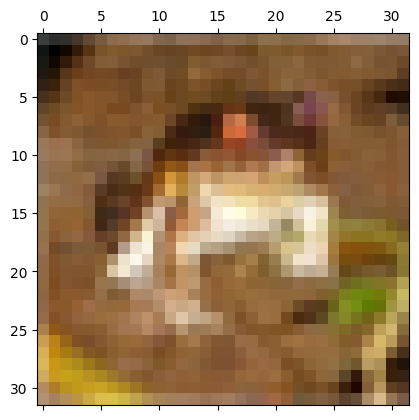

In [10]:
plt.figure(figsize=(1,2))
plt.matshow(X_train[0])


In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
# reshape for 1 D 

In [14]:
y_train = y_train.reshape(-1) # 10 thousand row 

In [15]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [16]:
y_test = y_test.reshape(-1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [19]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [24]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

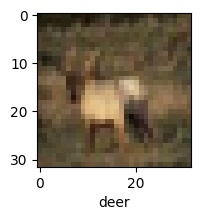

In [26]:
plot_sample(X_train,y_train,3)

In [27]:
# Normalize training data

In [28]:
X_train = X_train/255
y_train = y_train/255


#  ANN Model

In [36]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'), #hidden layes create multiple
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD' ,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.1003 - loss: 0.0133
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.1009 - loss: 3.6113e-04
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.1007 - loss: 2.1189e-04
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.0978 - loss: 2.2158e-04
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.1004 - loss: 1.8460e-04


In [39]:
ann.evaluate(X_test,y_test)
#check accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1001 - loss: 5160.6489


[5133.4541015625, 0.10000000149011612]

# CNN Model

In [38]:

cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu' , input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'), #Hidden Layer
    
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam' ,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0994 - loss: 0.0390
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0998 - loss: 1.1469e-07
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.0996 - loss: 2.9751e-07
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.1015 - loss: 3.4150e-08
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.0993 - loss: 2.0875e-09


In [40]:
cnn.evaluate(X_test,y_test)
#check accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1001 - loss: 15877.0879


[15797.2001953125, 0.10000000149011612]

In [41]:
y_pred = cnn.predict(X_test)


y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
y_classes = [np.argmax(element)for element in y_pred]

In [45]:
y_classes[:5]

[0, 0, 0, 0, 0]

In [46]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)